In [107]:
#imports
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

#estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn import linear_model
from sklearn.feature_selection import RFE

#model metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score

#cross validation
from sklearn.model_selection import train_test_split

In [108]:
#data
rawData = pd.read_csv('trainingData.csv', header =0)
rawData.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,WAP016,WAP017,WAP018,WAP019,WAP020,WAP021,WAP022,WAP023,WAP024,WAP025,WAP026,WAP027,WAP028,WAP029,WAP030,WAP031,WAP032,WAP033,WAP034,WAP035,WAP036,WAP037,WAP038,WAP039,WAP040,WAP041,WAP042,WAP043,WAP044,WAP045,WAP046,WAP047,WAP048,WAP049,WAP050,WAP051,WAP052,WAP053,WAP054,WAP055,WAP056,WAP057,WAP058,WAP059,WAP060,WAP061,WAP062,WAP063,WAP064,WAP065,WAP066,WAP067,WAP068,WAP069,WAP070,WAP071,WAP072,WAP073,WAP074,WAP075,WAP076,WAP077,WAP078,WAP079,WAP080,WAP081,WAP082,WAP083,WAP084,WAP085,WAP086,WAP087,WAP088,WAP089,WAP090,WAP091,WAP092,WAP093,WAP094,WAP095,WAP096,WAP097,WAP098,WAP099,WAP100,WAP101,WAP102,WAP103,WAP104,WAP105,WAP106,WAP107,WAP108,WAP109,WAP110,WAP111,WAP112,WAP113,WAP114,WAP115,WAP116,WAP117,WAP118,WAP119,WAP120,WAP121,WAP122,WAP123,WAP124,WAP125,WAP126,WAP127,WAP128,WAP129,WAP130,WAP131,WAP132,WAP133,WAP134,WAP135,WAP136,WAP137,WAP138,WAP139,WAP140,WAP141,WAP142,WAP143,WAP144,WAP145,WAP146,WAP147,WAP148,WAP149,WAP150,WAP151,WAP152,WAP153,WAP154,WAP155,WAP156,WAP157,WAP158,WAP159,WAP160,WAP161,WAP162,WAP163,WAP164,WAP165,WAP166,WAP167,WAP168,WAP169,WAP170,WAP171,WAP172,WAP173,WAP174,WAP175,WAP176,WAP177,WAP178,WAP179,WAP180,WAP181,WAP182,WAP183,WAP184,WAP185,WAP186,WAP187,WAP188,WAP189,WAP190,WAP191,WAP192,WAP193,WAP194,WAP195,WAP196,WAP197,WAP198,WAP199,WAP200,WAP201,WAP202,WAP203,WAP204,WAP205,WAP206,WAP207,WAP208,WAP209,WAP210,WAP211,WAP212,WAP213,WAP214,WAP215,WAP216,WAP217,WAP218,WAP219,WAP220,WAP221,WAP222,WAP223,WAP224,WAP225,WAP226,WAP227,WAP228,WAP229,WAP230,WAP231,WAP232,WAP233,WAP234,WAP235,WAP236,WAP237,WAP238,WAP239,WAP240,WAP241,WAP242,WAP243,WAP244,WAP245,WAP246,WAP247,WAP248,WAP249,WAP250,WAP251,WAP252,WAP253,WAP254,WAP255,WAP256,WAP257,WAP258,WAP259,WAP260,WAP261,WAP262,WAP263,WAP264,WAP265,WAP266,WAP267,WAP268,WAP269,WAP270,WAP271,WAP272,WAP273,WAP274,WAP275,WAP276,WAP277,WAP278,WAP279,WAP280,WAP281,WAP282,WAP283,WAP284,WAP285,WAP286,WAP287,WAP288,WAP289,WAP290,WAP291,WAP292,WAP293,WAP294,WAP295,WAP296,WAP297,WAP298,WAP299,WAP300,WAP301,WAP302,WAP303,WAP304,WAP305,WAP306,WAP307,WAP308,WAP309,WAP310,WAP311,WAP312,WAP313,WAP314,WAP315,WAP316,WAP317,WAP318,WAP319,WAP320,WAP321,WAP322,WAP323,WAP324,WAP325,WAP326,WAP327,WAP328,WAP329,WAP330,WAP331,WAP332,WAP333,WAP334,WAP335,WAP336,WAP337,WAP338,WAP339,WAP340,WAP341,WAP342,WAP343,WAP344,WAP345,WAP346,WAP347,WAP348,WAP349,WAP350,WAP351,WAP352,WAP353,WAP354,WAP355,WAP356,WAP357,WAP358,WAP359,WAP360,WAP361,WAP362,WAP363,WAP364,WAP365,WAP366,WAP367,WAP368,WAP369,WAP370,WAP371,WAP372,WAP373,WAP374,WAP375,WAP376,WAP377,WAP378,WAP379,WAP380,WAP381,WAP382,WAP383,WAP384,WAP385,WAP386,WAP387,WAP388,WAP389,WAP390,WAP391,WAP392,WAP393,WAP394,WAP395,WAP396,WAP397,WAP398,WAP399,WAP400,WAP401,WAP402,WAP403,WAP404,WAP405,WAP406,WAP407,WAP408,WAP409,WAP410,WAP411,WAP412,WAP413,WAP414,WAP415,WAP416,WAP417,WAP418,WAP419,WAP420,WAP421,WAP422,WAP423,WAP424,WAP425,WAP426,WAP427,WAP428,WAP429,WAP430,WAP431,WAP432,WAP433,WAP434,WAP435,WAP436,WAP437,WAP438,WAP439,WAP440,WAP441,WAP442,WAP443,WAP444,WAP445,WAP446,WAP447,WAP448,WAP449,WAP450,WAP451,WAP452,WAP453,WAP454,WAP455,WAP456,WAP457,WAP458,WAP459,WAP460,WAP461,WAP462,WAP463,WAP464,WAP465,WAP466,WAP467,WAP468,WAP469,WAP470,WAP471,WAP472,WAP473,WAP474,WAP475,WAP476,WAP477,WAP478,WAP479,WAP480,WAP481,WAP482,WAP483,WAP484,WAP485,WAP486,WAP487,WAP488,WAP489,WAP490,WAP491,WAP492,WAP493,WAP494,WAP495,WAP496,WAP497,WAP498,WAP499,WAP500,WAP501,WAP502,WAP503,WAP504,WAP505,WAP506,WAP507,WAP508,WAP509,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100

In [109]:
rawData.tail()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,WAP016,WAP017,WAP018,WAP019,WAP020,WAP021,WAP022,WAP023,WAP024,WAP025,WAP026,WAP027,WAP028,WAP029,WAP030,WAP031,WAP032,WAP033,WAP034,WAP035,WAP036,WAP037,WAP038,WAP039,WAP040,WAP041,WAP042,WAP043,WAP044,WAP045,WAP046,WAP047,WAP048,WAP049,WAP050,WAP051,WAP052,WAP053,WAP054,WAP055,WAP056,WAP057,WAP058,WAP059,WAP060,WAP061,WAP062,WAP063,WAP064,WAP065,WAP066,WAP067,WAP068,WAP069,WAP070,WAP071,WAP072,WAP073,WAP074,WAP075,WAP076,WAP077,WAP078,WAP079,WAP080,WAP081,WAP082,WAP083,WAP084,WAP085,WAP086,WAP087,WAP088,WAP089,WAP090,WAP091,WAP092,WAP093,WAP094,WAP095,WAP096,WAP097,WAP098,WAP099,WAP100,WAP101,WAP102,WAP103,WAP104,WAP105,WAP106,WAP107,WAP108,WAP109,WAP110,WAP111,WAP112,WAP113,WAP114,WAP115,WAP116,WAP117,WAP118,WAP119,WAP120,WAP121,WAP122,WAP123,WAP124,WAP125,WAP126,WAP127,WAP128,WAP129,WAP130,WAP131,WAP132,WAP133,WAP134,WAP135,WAP136,WAP137,WAP138,WAP139,WAP140,WAP141,WAP142,WAP143,WAP144,WAP145,WAP146,WAP147,WAP148,WAP149,WAP150,WAP151,WAP152,WAP153,WAP154,WAP155,WAP156,WAP157,WAP158,WAP159,WAP160,WAP161,WAP162,WAP163,WAP164,WAP165,WAP166,WAP167,WAP168,WAP169,WAP170,WAP171,WAP172,WAP173,WAP174,WAP175,WAP176,WAP177,WAP178,WAP179,WAP180,WAP181,WAP182,WAP183,WAP184,WAP185,WAP186,WAP187,WAP188,WAP189,WAP190,WAP191,WAP192,WAP193,WAP194,WAP195,WAP196,WAP197,WAP198,WAP199,WAP200,WAP201,WAP202,WAP203,WAP204,WAP205,WAP206,WAP207,WAP208,WAP209,WAP210,WAP211,WAP212,WAP213,WAP214,WAP215,WAP216,WAP217,WAP218,WAP219,WAP220,WAP221,WAP222,WAP223,WAP224,WAP225,WAP226,WAP227,WAP228,WAP229,WAP230,WAP231,WAP232,WAP233,WAP234,WAP235,WAP236,WAP237,WAP238,WAP239,WAP240,WAP241,WAP242,WAP243,WAP244,WAP245,WAP246,WAP247,WAP248,WAP249,WAP250,WAP251,WAP252,WAP253,WAP254,WAP255,WAP256,WAP257,WAP258,WAP259,WAP260,WAP261,WAP262,WAP263,WAP264,WAP265,WAP266,WAP267,WAP268,WAP269,WAP270,WAP271,WAP272,WAP273,WAP274,WAP275,WAP276,WAP277,WAP278,WAP279,WAP280,WAP281,WAP282,WAP283,WAP284,WAP285,WAP286,WAP287,WAP288,WAP289,WAP290,WAP291,WAP292,WAP293,WAP294,WAP295,WAP296,WAP297,WAP298,WAP299,WAP300,WAP301,WAP302,WAP303,WAP304,WAP305,WAP306,WAP307,WAP308,WAP309,WAP310,WAP311,WAP312,WAP313,WAP314,WAP315,WAP316,WAP317,WAP318,WAP319,WAP320,WAP321,WAP322,WAP323,WAP324,WAP325,WAP326,WAP327,WAP328,WAP329,WAP330,WAP331,WAP332,WAP333,WAP334,WAP335,WAP336,WAP337,WAP338,WAP339,WAP340,WAP341,WAP342,WAP343,WAP344,WAP345,WAP346,WAP347,WAP348,WAP349,WAP350,WAP351,WAP352,WAP353,WAP354,WAP355,WAP356,WAP357,WAP358,WAP359,WAP360,WAP361,WAP362,WAP363,WAP364,WAP365,WAP366,WAP367,WAP368,WAP369,WAP370,WAP371,WAP372,WAP373,WAP374,WAP375,WAP376,WAP377,WAP378,WAP379,WAP380,WAP381,WAP382,WAP383,WAP384,WAP385,WAP386,WAP387,WAP388,WAP389,WAP390,WAP391,WAP392,WAP393,WAP394,WAP395,WAP396,WAP397,WAP398,WAP399,WAP400,WAP401,WAP402,WAP403,WAP404,WAP405,WAP406,WAP407,WAP408,WAP409,WAP410,WAP411,WAP412,WAP413,WAP414,WAP415,WAP416,WAP417,WAP418,WAP419,WAP420,WAP421,WAP422,WAP423,WAP424,WAP425,WAP426,WAP427,WAP428,WAP429,WAP430,WAP431,WAP432,WAP433,WAP434,WAP435,WAP436,WAP437,WAP438,WAP439,WAP440,WAP441,WAP442,WAP443,WAP444,WAP445,WAP446,WAP447,WAP448,WAP449,WAP450,WAP451,WAP452,WAP453,WAP454,WAP455,WAP456,WAP457,WAP458,WAP459,WAP460,WAP461,WAP462,WAP463,WAP464,WAP465,WAP466,WAP467,WAP468,WAP469,WAP470,WAP471,WAP472,WAP473,WAP474,WAP475,WAP476,WAP477,WAP478,WAP479,WAP480,WAP481,WAP482,WAP483,WAP484,WAP485,WAP486,WAP487,WAP488,WAP489,WAP490,WAP491,WAP492,WAP493,WAP494,WAP495,WAP496,WAP497,WAP498,WAP499,WAP500,WAP501,WAP502,WAP503,WAP504,WAP505,WAP506,WAP507,WAP508,WAP509,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
19932,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-75,-76,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-92,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100

In [110]:
rawData.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,WAP016,WAP017,WAP018,WAP019,WAP020,WAP021,WAP022,WAP023,WAP024,WAP025,WAP026,WAP027,WAP028,WAP029,WAP030,WAP031,WAP032,WAP033,WAP034,WAP035,WAP036,WAP037,WAP038,WAP039,WAP040,WAP041,WAP042,WAP043,WAP044,WAP045,WAP046,WAP047,WAP048,WAP049,WAP050,WAP051,WAP052,WAP053,WAP054,WAP055,WAP056,WAP057,WAP058,WAP059,WAP060,WAP061,WAP062,WAP063,WAP064,WAP065,WAP066,WAP067,WAP068,WAP069,WAP070,WAP071,WAP072,WAP073,WAP074,WAP075,WAP076,WAP077,WAP078,WAP079,WAP080,WAP081,WAP082,WAP083,WAP084,WAP085,WAP086,WAP087,WAP088,WAP089,WAP090,WAP091,WAP092,WAP093,WAP094,WAP095,WAP096,WAP097,WAP098,WAP099,WAP100,WAP101,WAP102,WAP103,WAP104,WAP105,WAP106,WAP107,WAP108,WAP109,WAP110,WAP111,WAP112,WAP113,WAP114,WAP115,WAP116,WAP117,WAP118,WAP119,WAP120,WAP121,WAP122,WAP123,WAP124,WAP125,WAP126,WAP127,WAP128,WAP129,WAP130,WAP131,WAP132,WAP133,WAP134,WAP135,WAP136,WAP137,WAP138,WAP139,WAP140,WAP141,WAP142,WAP143,WAP144,WAP145,WAP146,WAP147,WAP148,WAP149,WAP150,WAP151,WAP152,WAP153,WAP154,WAP155,WAP156,WAP157,WAP158,WAP159,WAP160,WAP161,WAP162,WAP163,WAP164,WAP165,WAP166,WAP167,WAP168,WAP169,WAP170,WAP171,WAP172,WAP173,WAP174,WAP175,WAP176,WAP177,WAP178,WAP179,WAP180,WAP181,WAP182,WAP183,WAP184,WAP185,WAP186,WAP187,WAP188,WAP189,WAP190,WAP191,WAP192,WAP193,WAP194,WAP195,WAP196,WAP197,WAP198,WAP199,WAP200,WAP201,WAP202,WAP203,WAP204,WAP205,WAP206,WAP207,WAP208,WAP209,WAP210,WAP211,WAP212,WAP213,WAP214,WAP215,WAP216,WAP217,WAP218,WAP219,WAP220,WAP221,WAP222,WAP223,WAP224,WAP225,WAP226,WAP227,WAP228,WAP229,WAP230,WAP231,WAP232,WAP233,WAP234,WAP235,WAP236,WAP237,WAP238,WAP239,WAP240,WAP241,WAP242,WAP243,WAP244,WAP245,WAP246,WAP247,WAP248,WAP249,WAP250,WAP251,WAP252,WAP253,WAP254,WAP255,WAP256,WAP257,WAP258,WAP259,WAP260,WAP261,WAP262,WAP263,WAP264,WAP265,WAP266,WAP267,WAP268,WAP269,WAP270,WAP271,WAP272,WAP273,WAP274,WAP275,WAP276,WAP277,WAP278,WAP279,WAP280,WAP281,WAP282,WAP283,WAP284,WAP285,WAP286,WAP287,WAP288,WAP289,WAP290,WAP291,WAP292,WAP293,WAP294,WAP295,WAP296,WAP297,WAP298,WAP299,WAP300,WAP301,WAP302,WAP303,WAP304,WAP305,WAP306,WAP307,WAP308,WAP309,WAP310,WAP311,WAP312,WAP313,WAP314,WAP315,WAP316,WAP317,WAP318,WAP319,WAP320,WAP321,WAP322,WAP323,WAP324,WAP325,WAP326,WAP327,WAP328,WAP329,WAP330,WAP331,WAP332,WAP333,WAP334,WAP335,WAP336,WAP337,WAP338,WAP339,WAP340,WAP341,WAP342,WAP343,WAP344,WAP345,WAP346,WAP347,WAP348,WAP349,WAP350,WAP351,WAP352,WAP353,WAP354,WAP355,WAP356,WAP357,WAP358,WAP359,WAP360,WAP361,WAP362,WAP363,WAP364,WAP365,WAP366,WAP367,WAP368,WAP369,WAP370,WAP371,WAP372,WAP373,WAP374,WAP375,WAP376,WAP377,WAP378,WAP379,WAP380,WAP381,WAP382,WAP383,WAP384,WAP385,WAP386,WAP387,WAP388,WAP389,WAP390,WAP391,WAP392,WAP393,WAP394,WAP395,WAP396,WAP397,WAP398,WAP399,WAP400,WAP401,WAP402,WAP403,WAP404,WAP405,WAP406,WAP407,WAP408,WAP409,WAP410,WAP411,WAP412,WAP413,WAP414,WAP415,WAP416,WAP417,WAP418,WAP419,WAP420,WAP421,WAP422,WAP423,WAP424,WAP425,WAP426,WAP427,WAP428,WAP429,WAP430,WAP431,WAP432,WAP433,WAP434,WAP435,WAP436,WAP437,WAP438,WAP439,WAP440,WAP441,WAP442,WAP443,WAP444,WAP445,WAP446,WAP447,WAP448,WAP449,WAP450,WAP451,WAP452,WAP453,WAP454,WAP455,WAP456,WAP457,WAP458,WAP459,WAP460,WAP461,WAP462,WAP463,WAP464,WAP465,WAP466,WAP467,WAP468,WAP469,WAP470,WAP471,WAP472,WAP473,WAP474,WAP475,WAP476,WAP477,WAP478,WAP479,WAP480,WAP481,WAP482,WAP483,WAP484,WAP485,WAP486,WAP487,WAP488,WAP489,WAP490,WAP491,WAP492,WAP493,WAP494,WAP495,WAP496,WAP497,WAP498,WAP499,WAP500,WAP501,WAP502,WAP503,WAP504,WAP505,WAP506,WAP507,WAP508,WAP509,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1993

In [111]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 80.5 MB


In [112]:
# Check for NULL values
rawData.isnull().values.any()

False

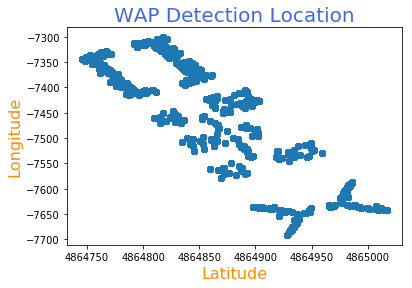

In [183]:
plt.scatter(rawData['LATITUDE'], rawData['LONGITUDE'])
plt.title('WAP Detection Location', color='royalblue', fontsize=20)
plt.xlabel("Latitude", color='darkorange',fontsize=16)
plt.ylabel("Longitude", color='darkorange', fontsize=16)
plt.show()

In [115]:
# Add location attributes - combination of BuildingID/ Floor/ SpaceID
rawData['Location'] = rawData['BUILDINGID'].astype(str).str.cat(rawData.FLOOR.astype(str),sep = '.')
rawData['Location'] = rawData['Location'].astype(str).str.cat(rawData.SPACEID.astype(str),sep = '.')
rawData['Location'].head()

0    1.2.106
1    1.2.106
2    1.2.103
3    1.2.102
4    0.0.122
Name: Location, dtype: object

In [116]:
# Replace undetected signal (100) with -105 to make data uniform
rawData.replace(to_replace=100, value= -105, inplace=True)
rawData.head()


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,WAP016,WAP017,WAP018,WAP019,WAP020,WAP021,WAP022,WAP023,WAP024,WAP025,WAP026,WAP027,WAP028,WAP029,WAP030,WAP031,WAP032,WAP033,WAP034,WAP035,WAP036,WAP037,WAP038,WAP039,WAP040,WAP041,WAP042,WAP043,WAP044,WAP045,WAP046,WAP047,WAP048,WAP049,WAP050,WAP051,WAP052,WAP053,WAP054,WAP055,WAP056,WAP057,WAP058,WAP059,WAP060,WAP061,WAP062,WAP063,WAP064,WAP065,WAP066,WAP067,WAP068,WAP069,WAP070,WAP071,WAP072,WAP073,WAP074,WAP075,WAP076,WAP077,WAP078,WAP079,WAP080,WAP081,WAP082,WAP083,WAP084,WAP085,WAP086,WAP087,WAP088,WAP089,WAP090,WAP091,WAP092,WAP093,WAP094,WAP095,WAP096,WAP097,WAP098,WAP099,WAP100,WAP101,WAP102,WAP103,WAP104,WAP105,WAP106,WAP107,WAP108,WAP109,WAP110,WAP111,WAP112,WAP113,WAP114,WAP115,WAP116,WAP117,WAP118,WAP119,WAP120,WAP121,WAP122,WAP123,WAP124,WAP125,WAP126,WAP127,WAP128,WAP129,WAP130,WAP131,WAP132,WAP133,WAP134,WAP135,WAP136,WAP137,WAP138,WAP139,WAP140,WAP141,WAP142,WAP143,WAP144,WAP145,WAP146,WAP147,WAP148,WAP149,WAP150,WAP151,WAP152,WAP153,WAP154,WAP155,WAP156,WAP157,WAP158,WAP159,WAP160,WAP161,WAP162,WAP163,WAP164,WAP165,WAP166,WAP167,WAP168,WAP169,WAP170,WAP171,WAP172,WAP173,WAP174,WAP175,WAP176,WAP177,WAP178,WAP179,WAP180,WAP181,WAP182,WAP183,WAP184,WAP185,WAP186,WAP187,WAP188,WAP189,WAP190,WAP191,WAP192,WAP193,WAP194,WAP195,WAP196,WAP197,WAP198,WAP199,WAP200,WAP201,WAP202,WAP203,WAP204,WAP205,WAP206,WAP207,WAP208,WAP209,WAP210,WAP211,WAP212,WAP213,WAP214,WAP215,WAP216,WAP217,WAP218,WAP219,WAP220,WAP221,WAP222,WAP223,WAP224,WAP225,WAP226,WAP227,WAP228,WAP229,WAP230,WAP231,WAP232,WAP233,WAP234,WAP235,WAP236,WAP237,WAP238,WAP239,WAP240,WAP241,WAP242,WAP243,WAP244,WAP245,WAP246,WAP247,WAP248,WAP249,WAP250,WAP251,WAP252,WAP253,WAP254,WAP255,WAP256,WAP257,WAP258,WAP259,WAP260,WAP261,WAP262,WAP263,WAP264,WAP265,WAP266,WAP267,WAP268,WAP269,WAP270,WAP271,WAP272,WAP273,WAP274,WAP275,WAP276,WAP277,WAP278,WAP279,WAP280,WAP281,WAP282,WAP283,WAP284,WAP285,WAP286,WAP287,WAP288,WAP289,WAP290,WAP291,WAP292,WAP293,WAP294,WAP295,WAP296,WAP297,WAP298,WAP299,WAP300,WAP301,WAP302,WAP303,WAP304,WAP305,WAP306,WAP307,WAP308,WAP309,WAP310,WAP311,WAP312,WAP313,WAP314,WAP315,WAP316,WAP317,WAP318,WAP319,WAP320,WAP321,WAP322,WAP323,WAP324,WAP325,WAP326,WAP327,WAP328,WAP329,WAP330,WAP331,WAP332,WAP333,WAP334,WAP335,WAP336,WAP337,WAP338,WAP339,WAP340,WAP341,WAP342,WAP343,WAP344,WAP345,WAP346,WAP347,WAP348,WAP349,WAP350,WAP351,WAP352,WAP353,WAP354,WAP355,WAP356,WAP357,WAP358,WAP359,WAP360,WAP361,WAP362,WAP363,WAP364,WAP365,WAP366,WAP367,WAP368,WAP369,WAP370,WAP371,WAP372,WAP373,WAP374,WAP375,WAP376,WAP377,WAP378,WAP379,WAP380,WAP381,WAP382,WAP383,WAP384,WAP385,WAP386,WAP387,WAP388,WAP389,WAP390,WAP391,WAP392,WAP393,WAP394,WAP395,WAP396,WAP397,WAP398,WAP399,WAP400,WAP401,WAP402,WAP403,WAP404,WAP405,WAP406,WAP407,WAP408,WAP409,WAP410,WAP411,WAP412,WAP413,WAP414,WAP415,WAP416,WAP417,WAP418,WAP419,WAP420,WAP421,WAP422,WAP423,WAP424,WAP425,WAP426,WAP427,WAP428,WAP429,WAP430,WAP431,WAP432,WAP433,WAP434,WAP435,WAP436,WAP437,WAP438,WAP439,WAP440,WAP441,WAP442,WAP443,WAP444,WAP445,WAP446,WAP447,WAP448,WAP449,WAP450,WAP451,WAP452,WAP453,WAP454,WAP455,WAP456,WAP457,WAP458,WAP459,WAP460,WAP461,WAP462,WAP463,WAP464,WAP465,WAP466,WAP467,WAP468,WAP469,WAP470,WAP471,WAP472,WAP473,WAP474,WAP475,WAP476,WAP477,WAP478,WAP479,WAP480,WAP481,WAP482,WAP483,WAP484,WAP485,WAP486,WAP487,WAP488,WAP489,WAP490,WAP491,WAP492,WAP493,WAP494,WAP495,WAP496,WAP497,WAP498,WAP499,WAP500,WAP501,WAP502,WAP503,WAP504,WAP505,WAP506,WAP507,WAP508,WAP509,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,Location
0,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-1

In [117]:
# Check type of location attribute - object
rawData.Location.dtype

dtype('O')

In [118]:
#preprocessing
# convert location to categorical type
#drop unused attributes

readyData = rawData

readyData['Location'] = readyData.Location.astype('category')

readyData = readyData.drop(['LATITUDE'], axis=1)
readyData = readyData.drop(['LONGITUDE'], axis=1)
readyData = readyData.drop(['USERID'], axis=1)
readyData = readyData.drop(['PHONEID'], axis=1)
readyData = readyData.drop(['TIMESTAMP'], axis=1)
readyData = readyData.drop(['RELATIVEPOSITION'], axis=1)


readyData.info()
readyData.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 524 entries, WAP001 to Location
dtypes: category(1), int64(523)
memory usage: 79.6 MB


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,WAP016,WAP017,WAP018,WAP019,WAP020,WAP021,WAP022,WAP023,WAP024,WAP025,WAP026,WAP027,WAP028,WAP029,WAP030,WAP031,WAP032,WAP033,WAP034,WAP035,WAP036,WAP037,WAP038,WAP039,WAP040,WAP041,WAP042,WAP043,WAP044,WAP045,WAP046,WAP047,WAP048,WAP049,WAP050,WAP051,WAP052,WAP053,WAP054,WAP055,WAP056,WAP057,WAP058,WAP059,WAP060,WAP061,WAP062,WAP063,WAP064,WAP065,WAP066,WAP067,WAP068,WAP069,WAP070,WAP071,WAP072,WAP073,WAP074,WAP075,WAP076,WAP077,WAP078,WAP079,WAP080,WAP081,WAP082,WAP083,WAP084,WAP085,WAP086,WAP087,WAP088,WAP089,WAP090,WAP091,WAP092,WAP093,WAP094,WAP095,WAP096,WAP097,WAP098,WAP099,WAP100,WAP101,WAP102,WAP103,WAP104,WAP105,WAP106,WAP107,WAP108,WAP109,WAP110,WAP111,WAP112,WAP113,WAP114,WAP115,WAP116,WAP117,WAP118,WAP119,WAP120,WAP121,WAP122,WAP123,WAP124,WAP125,WAP126,WAP127,WAP128,WAP129,WAP130,WAP131,WAP132,WAP133,WAP134,WAP135,WAP136,WAP137,WAP138,WAP139,WAP140,WAP141,WAP142,WAP143,WAP144,WAP145,WAP146,WAP147,WAP148,WAP149,WAP150,WAP151,WAP152,WAP153,WAP154,WAP155,WAP156,WAP157,WAP158,WAP159,WAP160,WAP161,WAP162,WAP163,WAP164,WAP165,WAP166,WAP167,WAP168,WAP169,WAP170,WAP171,WAP172,WAP173,WAP174,WAP175,WAP176,WAP177,WAP178,WAP179,WAP180,WAP181,WAP182,WAP183,WAP184,WAP185,WAP186,WAP187,WAP188,WAP189,WAP190,WAP191,WAP192,WAP193,WAP194,WAP195,WAP196,WAP197,WAP198,WAP199,WAP200,WAP201,WAP202,WAP203,WAP204,WAP205,WAP206,WAP207,WAP208,WAP209,WAP210,WAP211,WAP212,WAP213,WAP214,WAP215,WAP216,WAP217,WAP218,WAP219,WAP220,WAP221,WAP222,WAP223,WAP224,WAP225,WAP226,WAP227,WAP228,WAP229,WAP230,WAP231,WAP232,WAP233,WAP234,WAP235,WAP236,WAP237,WAP238,WAP239,WAP240,WAP241,WAP242,WAP243,WAP244,WAP245,WAP246,WAP247,WAP248,WAP249,WAP250,WAP251,WAP252,WAP253,WAP254,WAP255,WAP256,WAP257,WAP258,WAP259,WAP260,WAP261,WAP262,WAP263,WAP264,WAP265,WAP266,WAP267,WAP268,WAP269,WAP270,WAP271,WAP272,WAP273,WAP274,WAP275,WAP276,WAP277,WAP278,WAP279,WAP280,WAP281,WAP282,WAP283,WAP284,WAP285,WAP286,WAP287,WAP288,WAP289,WAP290,WAP291,WAP292,WAP293,WAP294,WAP295,WAP296,WAP297,WAP298,WAP299,WAP300,WAP301,WAP302,WAP303,WAP304,WAP305,WAP306,WAP307,WAP308,WAP309,WAP310,WAP311,WAP312,WAP313,WAP314,WAP315,WAP316,WAP317,WAP318,WAP319,WAP320,WAP321,WAP322,WAP323,WAP324,WAP325,WAP326,WAP327,WAP328,WAP329,WAP330,WAP331,WAP332,WAP333,WAP334,WAP335,WAP336,WAP337,WAP338,WAP339,WAP340,WAP341,WAP342,WAP343,WAP344,WAP345,WAP346,WAP347,WAP348,WAP349,WAP350,WAP351,WAP352,WAP353,WAP354,WAP355,WAP356,WAP357,WAP358,WAP359,WAP360,WAP361,WAP362,WAP363,WAP364,WAP365,WAP366,WAP367,WAP368,WAP369,WAP370,WAP371,WAP372,WAP373,WAP374,WAP375,WAP376,WAP377,WAP378,WAP379,WAP380,WAP381,WAP382,WAP383,WAP384,WAP385,WAP386,WAP387,WAP388,WAP389,WAP390,WAP391,WAP392,WAP393,WAP394,WAP395,WAP396,WAP397,WAP398,WAP399,WAP400,WAP401,WAP402,WAP403,WAP404,WAP405,WAP406,WAP407,WAP408,WAP409,WAP410,WAP411,WAP412,WAP413,WAP414,WAP415,WAP416,WAP417,WAP418,WAP419,WAP420,WAP421,WAP422,WAP423,WAP424,WAP425,WAP426,WAP427,WAP428,WAP429,WAP430,WAP431,WAP432,WAP433,WAP434,WAP435,WAP436,WAP437,WAP438,WAP439,WAP440,WAP441,WAP442,WAP443,WAP444,WAP445,WAP446,WAP447,WAP448,WAP449,WAP450,WAP451,WAP452,WAP453,WAP454,WAP455,WAP456,WAP457,WAP458,WAP459,WAP460,WAP461,WAP462,WAP463,WAP464,WAP465,WAP466,WAP467,WAP468,WAP469,WAP470,WAP471,WAP472,WAP473,WAP474,WAP475,WAP476,WAP477,WAP478,WAP479,WAP480,WAP481,WAP482,WAP483,WAP484,WAP485,WAP486,WAP487,WAP488,WAP489,WAP490,WAP491,WAP492,WAP493,WAP494,WAP495,WAP496,WAP497,WAP498,WAP499,WAP500,WAP501,WAP502,WAP503,WAP504,WAP505,WAP506,WAP507,WAP508,WAP509,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,FLOOR,BUILDINGID,SPACEID,Location
0,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-10

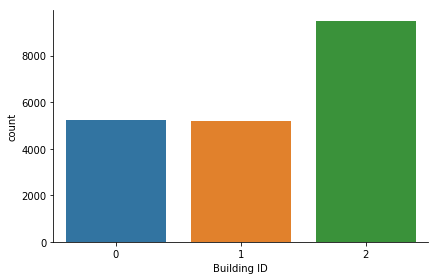

In [184]:
# Distribution of data by building
fg = sns.factorplot('BUILDINGID', data=readyData, kind='count', aspect=1.5)
fg.set_xlabels('Building ID')

In [122]:
# Subset Building #0
readyData_0 = readyData[readyData['BUILDINGID'] ==0 ]
readyData_0.head()
readyData_0.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 5249 entries, 4 to 18497
Columns: 524 entries, WAP001 to Location
dtypes: category(1), int64(523)
memory usage: 21.0 MB


In [124]:
# Subset Building #1
readyData_1 = readyData[readyData['BUILDINGID'] ==1 ]
readyData_1.head()
readyData_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5196 entries, 0 to 19936
Columns: 524 entries, WAP001 to Location
dtypes: category(1), int64(523)
memory usage: 20.8 MB


In [126]:
# Subset Building #2
readyData_2 = readyData[readyData['BUILDINGID'] ==2 ]
readyData_2.head()
readyData_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9492 entries, 46 to 19933
Columns: 524 entries, WAP001 to Location
dtypes: category(1), int64(523)
memory usage: 38.0 MB


In [185]:
# Sampling - 30% of data
seed = 7
readyData_30p = readyData_0.sample(frac = 0.3, random_state = seed)
#readyData_30p = readyData_0

In [186]:
#features
features = readyData_30p.iloc[:,0:520]
print('Summary of feature sample')
features.head()

Summary of feature sample


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,WAP016,WAP017,WAP018,WAP019,WAP020,WAP021,WAP022,WAP023,WAP024,WAP025,WAP026,WAP027,WAP028,WAP029,WAP030,WAP031,WAP032,WAP033,WAP034,WAP035,WAP036,WAP037,WAP038,WAP039,WAP040,WAP041,WAP042,WAP043,WAP044,WAP045,WAP046,WAP047,WAP048,WAP049,WAP050,WAP051,WAP052,WAP053,WAP054,WAP055,WAP056,WAP057,WAP058,WAP059,WAP060,WAP061,WAP062,WAP063,WAP064,WAP065,WAP066,WAP067,WAP068,WAP069,WAP070,WAP071,WAP072,WAP073,WAP074,WAP075,WAP076,WAP077,WAP078,WAP079,WAP080,WAP081,WAP082,WAP083,WAP084,WAP085,WAP086,WAP087,WAP088,WAP089,WAP090,WAP091,WAP092,WAP093,WAP094,WAP095,WAP096,WAP097,WAP098,WAP099,WAP100,WAP101,WAP102,WAP103,WAP104,WAP105,WAP106,WAP107,WAP108,WAP109,WAP110,WAP111,WAP112,WAP113,WAP114,WAP115,WAP116,WAP117,WAP118,WAP119,WAP120,WAP121,WAP122,WAP123,WAP124,WAP125,WAP126,WAP127,WAP128,WAP129,WAP130,WAP131,WAP132,WAP133,WAP134,WAP135,WAP136,WAP137,WAP138,WAP139,WAP140,WAP141,WAP142,WAP143,WAP144,WAP145,WAP146,WAP147,WAP148,WAP149,WAP150,WAP151,WAP152,WAP153,WAP154,WAP155,WAP156,WAP157,WAP158,WAP159,WAP160,WAP161,WAP162,WAP163,WAP164,WAP165,WAP166,WAP167,WAP168,WAP169,WAP170,WAP171,WAP172,WAP173,WAP174,WAP175,WAP176,WAP177,WAP178,WAP179,WAP180,WAP181,WAP182,WAP183,WAP184,WAP185,WAP186,WAP187,WAP188,WAP189,WAP190,WAP191,WAP192,WAP193,WAP194,WAP195,WAP196,WAP197,WAP198,WAP199,WAP200,WAP201,WAP202,WAP203,WAP204,WAP205,WAP206,WAP207,WAP208,WAP209,WAP210,WAP211,WAP212,WAP213,WAP214,WAP215,WAP216,WAP217,WAP218,WAP219,WAP220,WAP221,WAP222,WAP223,WAP224,WAP225,WAP226,WAP227,WAP228,WAP229,WAP230,WAP231,WAP232,WAP233,WAP234,WAP235,WAP236,WAP237,WAP238,WAP239,WAP240,WAP241,WAP242,WAP243,WAP244,WAP245,WAP246,WAP247,WAP248,WAP249,WAP250,WAP251,WAP252,WAP253,WAP254,WAP255,WAP256,WAP257,WAP258,WAP259,WAP260,WAP261,WAP262,WAP263,WAP264,WAP265,WAP266,WAP267,WAP268,WAP269,WAP270,WAP271,WAP272,WAP273,WAP274,WAP275,WAP276,WAP277,WAP278,WAP279,WAP280,WAP281,WAP282,WAP283,WAP284,WAP285,WAP286,WAP287,WAP288,WAP289,WAP290,WAP291,WAP292,WAP293,WAP294,WAP295,WAP296,WAP297,WAP298,WAP299,WAP300,WAP301,WAP302,WAP303,WAP304,WAP305,WAP306,WAP307,WAP308,WAP309,WAP310,WAP311,WAP312,WAP313,WAP314,WAP315,WAP316,WAP317,WAP318,WAP319,WAP320,WAP321,WAP322,WAP323,WAP324,WAP325,WAP326,WAP327,WAP328,WAP329,WAP330,WAP331,WAP332,WAP333,WAP334,WAP335,WAP336,WAP337,WAP338,WAP339,WAP340,WAP341,WAP342,WAP343,WAP344,WAP345,WAP346,WAP347,WAP348,WAP349,WAP350,WAP351,WAP352,WAP353,WAP354,WAP355,WAP356,WAP357,WAP358,WAP359,WAP360,WAP361,WAP362,WAP363,WAP364,WAP365,WAP366,WAP367,WAP368,WAP369,WAP370,WAP371,WAP372,WAP373,WAP374,WAP375,WAP376,WAP377,WAP378,WAP379,WAP380,WAP381,WAP382,WAP383,WAP384,WAP385,WAP386,WAP387,WAP388,WAP389,WAP390,WAP391,WAP392,WAP393,WAP394,WAP395,WAP396,WAP397,WAP398,WAP399,WAP400,WAP401,WAP402,WAP403,WAP404,WAP405,WAP406,WAP407,WAP408,WAP409,WAP410,WAP411,WAP412,WAP413,WAP414,WAP415,WAP416,WAP417,WAP418,WAP419,WAP420,WAP421,WAP422,WAP423,WAP424,WAP425,WAP426,WAP427,WAP428,WAP429,WAP430,WAP431,WAP432,WAP433,WAP434,WAP435,WAP436,WAP437,WAP438,WAP439,WAP440,WAP441,WAP442,WAP443,WAP444,WAP445,WAP446,WAP447,WAP448,WAP449,WAP450,WAP451,WAP452,WAP453,WAP454,WAP455,WAP456,WAP457,WAP458,WAP459,WAP460,WAP461,WAP462,WAP463,WAP464,WAP465,WAP466,WAP467,WAP468,WAP469,WAP470,WAP471,WAP472,WAP473,WAP474,WAP475,WAP476,WAP477,WAP478,WAP479,WAP480,WAP481,WAP482,WAP483,WAP484,WAP485,WAP486,WAP487,WAP488,WAP489,WAP490,WAP491,WAP492,WAP493,WAP494,WAP495,WAP496,WAP497,WAP498,WAP499,WAP500,WAP501,WAP502,WAP503,WAP504,WAP505,WAP506,WAP507,WAP508,WAP509,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
9860,-105,-105,-105,-105,-105,-105,-93,-105,-86,-105,-105,-105,-79,-80,-105,-105,-105,-105,-105,-93,-105,-105,-87,-84,-105,-105,-105,-105,-75,-75,-105,-105,-105,-105,-105,-105,-105,-105,-90,-105,-69,-70,-105,-105,-105,-89,-88,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-105,-10

In [187]:
# Dependent variable
depVar = readyData_30p['Location']

In [188]:
# Train and Test sets - 75/25 split
test_size = 0.25 
seed = 7 
X_train, X_test, Y_train, Y_test = train_test_split(features, depVar, test_size=test_size, random_state=seed)
#Train/ Test set size
print('The number of observations in the training set are:',str(len(X_train.index)))
print('The number of observations in the test set are:',str(len(X_test.index)))

The number of observations in the training set are: 1181
The number of observations in the test set are: 394


In [189]:
# Prepare models
models = [] 
models.append(('LR', LogisticRegression(solver = 'liblinear', multi_class = 'auto'))) 
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', svm.SVC(gamma='scale')))
models.append(('RF', RandomForestClassifier(n_estimators=100))) 


In [190]:
# evaluate each model in turn 
results = [] 
names = [] 
scoring = 'accuracy' 
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7) 
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring) 
    results.append(cv_results)
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
    print(msg)


LR: 0.464884 (0.047307)
KNN: 0.363267 (0.050159)
SVM: 0.414072 (0.038327)
RF: 0.590215 (0.030964)


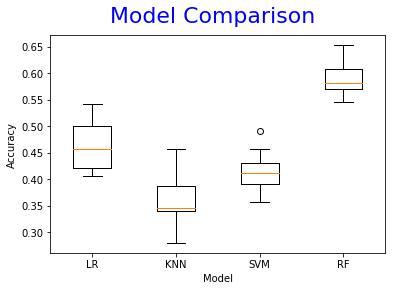

In [191]:
#algorithm comparison 
fig = plt.figure() 
fig.suptitle('Model Comparison',fontsize=22, color='blue') 
ax = fig.add_subplot(111)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()


# Algorithms comparison

1. OOB - All data processed at once
LR: 0.547379 (0.030143)
KNN: 0.466677 (0.021446)
SVM: 0.502567 (0.023998)
RF: 0.663998 (0.018234)

2. Subset Each Building

Building #0
LR: 0.464884 (0.047307)
KNN: 0.363267 (0.050159)
SVM: 0.414072 (0.038327)
RF: 0.586797 (0.033338)   Tuned RF: Best: 0.607959 using {'max_features': 2, 'n_estimators': 500}

Building #1
LR: 0.636435 (0.028475)
KNN: 0.579996 (0.024675)
SVM: 0.593715 (0.052271)
RF: 0.727174 (0.039693)  Tuned RF: Best: 0.750214 using {'max_features': 4, 'n_estimators': 200}

Building #2
LR: 0.518727 (0.026860)
KNN: 0.457867 (0.029747)
SVM: 0.503284 (0.039349)
RF: 0.678832 (0.020231) Tuned RF: Best: 0.695225 using {'max_features': 2, 'n_estimators': 1000}




In [192]:
# Tune KNN
neighbors = [1,10,20,50,100]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=10, random_state=7)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.547841 using {'n_neighbors': 1}
0.547841 (0.038264) with: {'n_neighbors': 1}
0.259102 (0.045753) with: {'n_neighbors': 10}
0.176969 (0.032245) with: {'n_neighbors': 20}
0.104996 (0.024815) with: {'n_neighbors': 50}
0.061812 (0.026770) with: {'n_neighbors': 100}


In [193]:
# Tune SVM
c_values = [0.1, 1.0, 10]
kernel_values = ['linear']
param_grid = dict(C = c_values)  #, kernel=kernel_values)
model = svm.SVC(gamma='scale')
kfold = KFold(n_splits=3, random_state=7)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.469941 using {'C': 10}
0.010161 (0.005479) with: {'C': 0.1}
0.335309 (0.011242) with: {'C': 1.0}
0.469941 (0.006919) with: {'C': 10}


In [194]:
# Tune RF
n_estimators_values = [50, 100, 200, 500, 1000]
max_features_values = [2,3,4]
param_grid = dict(n_estimators = n_estimators_values, max_features = max_features_values)
model = RandomForestClassifier()
kfold = KFold(n_splits=10, random_state=7)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.609653 using {'max_features': 4, 'n_estimators': 500}
0.585944 (0.042968) with: {'max_features': 2, 'n_estimators': 50}
0.582557 (0.033453) with: {'max_features': 2, 'n_estimators': 100}
0.607959 (0.029773) with: {'max_features': 2, 'n_estimators': 200}
0.605419 (0.035109) with: {'max_features': 2, 'n_estimators': 500}
0.602879 (0.037852) with: {'max_features': 2, 'n_estimators': 1000}
0.573243 (0.039873) with: {'max_features': 3, 'n_estimators': 50}
0.587638 (0.032276) with: {'max_features': 3, 'n_estimators': 100}
0.594412 (0.021787) with: {'max_features': 3, 'n_estimators': 200}
0.599492 (0.036650) with: {'max_features': 3, 'n_estimators': 500}
0.605419 (0.032564) with: {'max_features': 3, 'n_estimators': 1000}
0.581710 (0.040453) with: {'max_features': 4, 'n_estimators': 50}
0.586791 (0.039035) with: {'max_features': 4, 'n_estimators': 100}
0.606266 (0.041998) with: {'max_features': 4, 'n_estimators': 200}
0.609653 (0.031415) with: {'max_features': 4, 'n_estimators': 500}
0

In [200]:
# Tune LR
C_values = [0.01,0.1,1,10,100,500]
penalty_values = ['l1', 'l2']
param_grid = dict(penalty = penalty_values, C = C_values)
model = LogisticRegression(solver = 'liblinear',  multi_class = 'auto')
kfold = KFold(n_splits=3, random_state=7)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Best: 0.439458 using {'C': 0.01, 'penalty': 'l2'}
0.095682 (0.004431) with: {'C': 0.01, 'penalty': 'l1'}
0.439458 (0.010832) with: {'C': 0.01, 'penalty': 'l2'}
0.370025 (0.002206) with: {'C': 0.1, 'penalty': 'l1'}
0.427604 (0.009136) with: {'C': 0.1, 'penalty': 'l2'}
0.405588 (0.007690) with: {'C': 1, 'penalty': 'l1'}
0.416596 (0.012882) with: {'C': 1, 'penalty': 'l2'}
0.409822 (0.007257) with: {'C': 10, 'penalty': 'l1'}
0.415749 (0.006991) with: {'C': 10, 'penalty': 'l2'}
0.417443 (0.007257) with: {'C': 100, 'penalty': 'l1'}
0.413209 (0.010527) with: {'C': 100, 'penalty': 'l2'}
0.419983 (0.010505) with: {'C': 500, 'penalty': 'l1'}
0.413209 (0.011011) with: {'C': 500, 'penalty': 'l2'}


In [196]:
# Finalize Model: Random forest with all data

# prepare the model

model = RandomForestClassifier(max_features = 2, n_estimators = 1000)
model.fit(X_train, Y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [197]:
# make predictions
predictions = model.predict(X_test)


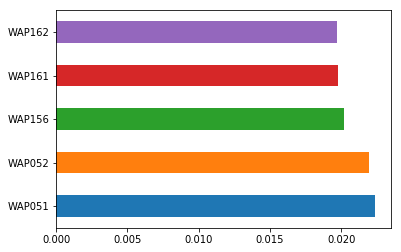

In [198]:
# Feature Importance
# print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index= features.columns)
feat_importances.nlargest(5).plot(kind='barh')

In [199]:
# summarize the fit of the model
print('Accuracy: %.2f' % accuracy_score(Y_test, predictions))
print('Kappa: %.2f' % cohen_kappa_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
# print(classification_report(Y_test, predictions))

Accuracy: 0.63
Kappa: 0.63
[[2 0 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]


# Final model metrics 
 
#Building #0
 Accuracy: 0.81
 Kappa: 0.81

#Building #1
 Accuracy: 0.91
 Kappa: 0.91

#Building #2
 Accuracy: 0.86
 Kappa: 0.86